## Made with TF 2.0


In [ ]:
import tensorflow
print(tensorflow.__version__)

2.4.1


In [ ]:
#%tensorflow_version 1.x

In [18]:
import pandas as pd

In [19]:
!wget https://frenzy86.s3.eu-west-2.amazonaws.com/IFAO/fake_reg.csv

--2021-03-09 12:07:35--  https://frenzy86.s3.eu-west-2.amazonaws.com/IFAO/fake_reg.csv
Resolving frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)... 52.95.148.22
Connecting to frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)|52.95.148.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 55914 (55K) [text/csv]
Saving to: ‘fake_reg.csv’

fake_reg.csv        100%[===================>]  54.60K  --.-KB/s    in 0.09s   

2021-03-09 12:07:35 (629 KB/s) - ‘fake_reg.csv’ saved [55914/55914]



In [20]:
df = pd.read_csv('fake_reg.csv')

In [21]:
df

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531
...,...,...,...
995,476.526078,1000.018988,999.672732
996,457.313186,998.855379,1000.020026
997,456.720992,1001.451646,998.847606
998,403.315576,1000.771023,998.562851


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     1000 non-null   float64
 1   feature1  1000 non-null   float64
 2   feature2  1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


### Explore the data

Diamo un occhio a come sono distribuiti gli observation tra le features e la target(price)

In [23]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

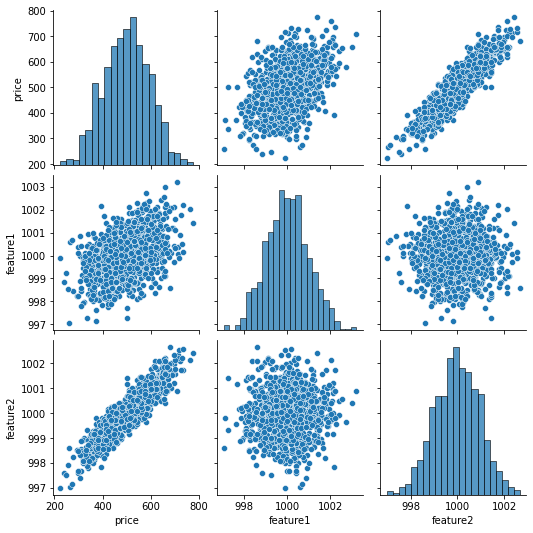

In [24]:
sns.pairplot(df)

Feel free to visualize more, but this data is fake, so we will focus on feature engineering and exploratory data analysis later on in the course in much more detail!

### Test/Train Split

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
# Convert Pandas to Numpy for Keras
# Features
X = df[['feature1','feature2']].values
# Target
y = df['price'].values

# Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=667)

In [27]:
X_train.shape

(700, 2)

In [28]:
X_test.shape

(300, 2)

In [29]:
y_train.shape

(700,)

In [30]:
y_test.shape

(300,)

## ML classic problem

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
model = LinearRegression()

In [33]:
model = model.fit(X_train,y_train)

In [34]:
model.intercept_

-127996.09402376022

In [35]:
model.coef_

array([40.05241913, 88.44347527])

In [36]:
y_predict = model.predict(X_test)
y_predict

array([449.54731242, 350.13426599, 503.44344541, 640.20035819,
       508.60922283, 425.87510453, 481.78977753, 409.58978812,
       542.09401314, 528.05833606, 321.85779475, 459.95745013,
       411.7361376 , 579.24731239, 359.84303412, 402.63006552,
       657.32449724, 618.64288618, 454.28368347, 462.59508937,
       326.08322973, 466.49668598, 474.27934369, 640.86263231,
       732.96483057, 449.50899947, 615.16456875, 466.22407861,
       627.15081647, 511.75040285, 698.46880844, 464.11728585,
       490.73377174, 489.75072166, 400.37537785, 432.31552244,
       471.61615572, 459.30776965, 341.28429936, 473.47042087,
       409.0031019 , 573.7908117 , 449.41149122, 566.47068212,
       573.57250376, 597.42942455, 659.22373175, 645.36826026,
       519.65454145, 570.71373135, 614.13919107, 598.35559592,
       522.80135663, 528.85532025, 543.41029515, 512.61975405,
       446.44182563, 556.3062501 , 579.40089266, 524.44869925,
       322.26015212, 472.39838844, 381.24989059, 486.53

In [37]:
confronto = pd.DataFrame(data = [y_predict,y_test])
confronto = confronto.T
confronto.columns = ['predetti', 'reali_test']
confronto

,predetti,reali_test
0,449.547312,446.612510
1,350.134266,349.717994
2,503.443445,508.911765
3,640.200358,635.347066
4,508.609223,505.692709
...,...,...
295,549.531876,553.879996
296,598.954410,610.455352
297,556.621700,565.936200
298,502.919643,493.012018


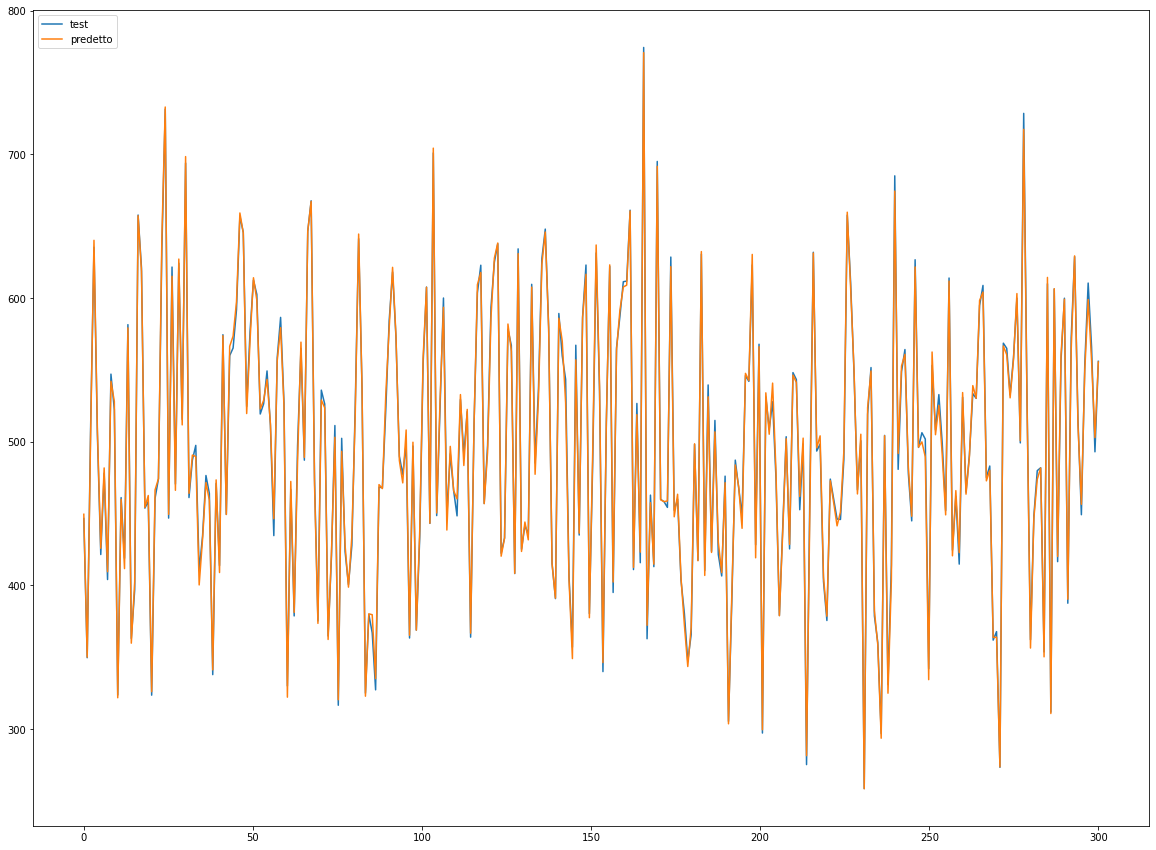

In [38]:
length = y_predict.shape[0] # 30 
x = np.linspace(0,length,length)


plt.figure(figsize=(20,15))
plt.plot(x, y_test, label='test')
plt.plot(x, y_predict, label='predetto')
plt.legend(loc=2);

In [39]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [40]:
score = r2_score(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)

print('r2_score: ', score)
print('mae: ', mae)
print('mse: ', mse)

r2_score:  0.9971374826155941
mae:  4.066973142948772
mse:  25.73216936967932


In [41]:
#model.predict([])

## Preparing Data for Neural Network

## Normalizing/Scaling the Data

We scale the feature data.

[Why we don't need to scale the label](https://stats.stackexchange.com/questions/111467/is-it-necessary-to-scale-the-target-value-in-addition-to-scaling-features-for-re)

In [42]:
from sklearn.preprocessing import MinMaxScaler

In [43]:
#help(MinMaxScaler)

In [44]:
scaler = MinMaxScaler()

In [45]:
# Notice to prevent data leakage from the test set, we only fit our scaler to the training set

In [46]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [47]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# TensorFlow 2.0 Syntax


## Import Options

There are several ways you can import Keras from Tensorflow (this is hugely a personal style choice, please use any import methods you prefer). We will use the method shown in the **official TF documentation**.

In [48]:
import tensorflow as tf

In [49]:
from tensorflow.keras.models import Sequential

In [50]:
#help(Sequential)

## Creating a Model

There are two ways to create models through the TF 2 Keras API, either pass in a list of layers all at once, or add them one by one.

Let's show both methods (its up to you to choose which method you prefer).

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

### Model - as a list of layers

In [52]:
# model = Sequential([
#     Dense(units=2),
#     Dense(units=2),
#     Dense(units=2)
# ])

### Model - adding in layers one by one

In [53]:
model = Sequential()

model.add(Dense(2))
model.add(Dense(2))
model.add(Dense(2))

Let's go ahead and build a simple model and then compile it by defining our solver

In [61]:
X_train.shape[1]

2

In [54]:
model = Sequential()

model.add(Dense(4,input_dim=X_train.shape[1],activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))

# Final output node for prediction
model.add(Dense(1))

### RMSPROP
RMSPROP algorithm that’s used for full-batch optimization. RMSPROP tries to resolve the problem that gradients may vary widely in magnitudes. Some gradients may be tiny and others may be huge, which result in very difficult problem — trying to find a single global learning rate for the algorithm. If we use full-batch learning we can cope with this problem by only using the sign of the gradient. With that, we can guarantee that all weight updates are of the same size. This adjustment helps a great deal with saddle points and plateaus as we take big enough steps even with tiny gradients.

https://keras.io/api/optimizers/

In [55]:
#model.compile(optimizer='SGD',loss='mse',metrics=['accuracy']) # Stochastic Gradient Descent

In [56]:
model.compile(optimizer='rmsprop',loss='mse',metrics=['accuracy'])

### Choosing an optimizer and loss

Keep in mind what kind of problem you are trying to solve:

    # For a multi-class classification problem
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # For a mean squared error regression problem
    model.compile(optimizer='rmsprop',
                  loss='mse')

# Training

Below are some common definitions that are necessary to know and understand to correctly utilize Keras:

* Sample: one element of a dataset.
    * Example: one image is a sample in a convolutional network
    * Example: one audio file is a sample for a speech recognition model
* Batch: a set of N samples. The samples in a batch are processed independently, in parallel. If training, a batch results in only one update to the model.A batch generally approximates the distribution of the input data better than a single input. The larger the batch, the better the approximation; however, it is also true that the batch will take longer to process and will still result in only one update. For inference (evaluate/predict), it is recommended to pick a batch size that is as large as you can afford without going out of memory (since larger batches will usually result in faster evaluation/prediction).
* Epoch: an arbitrary cutoff, generally defined as "one pass over the entire dataset", used to separate training into distinct phases, which is useful for logging and periodic evaluation.

In [57]:
model.fit(X_train,y_train,epochs=250)

Epoch 1/250
22/22 [==============================] - 1s 1ms/step - loss: 259147.2996 - accuracy: 0.0000e+00
Epoch 2/250
22/22 [==============================] - 0s 2ms/step - loss: 254722.9477 - accuracy: 0.0000e+00
Epoch 3/250
22/22 [==============================] - 0s 1ms/step - loss: 256771.9293 - accuracy: 0.0000e+00
Epoch 4/250
22/22 [==============================] - 0s 1ms/step - loss: 265024.6746 - accuracy: 0.0000e+00
Epoch 5/250
22/22 [==============================] - 0s 1ms/step - loss: 252602.8859 - accuracy: 0.0000e+00
Epoch 6/250
22/22 [==============================] - 0s 1ms/step - loss: 258280.3091 - accuracy: 0.0000e+00
Epoch 7/250
22/22 [==============================] - 0s 1ms/step - loss: 253803.3601 - accuracy: 0.0000e+00
Epoch 8/250
22/22 [==============================] - 0s 1ms/step - loss: 258413.6277 - accuracy: 0.0000e+00
Epoch 9/250
22/22 [==============================] - 0s 1ms/step - loss: 256745.8077 - accuracy: 0.0000e+00
Epoch 10/250
22/22 [========

## Evaluation

Let's evaluate our performance on our training set and our test set. We can compare these two performances to check for overfitting.

In [58]:
model.history.history

{'accuracy': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
 

In [59]:
loss = model.history.history['loss']

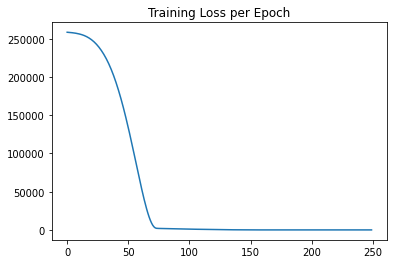

In [60]:
sns.lineplot(x=range(len(loss)),y=loss)
plt.title("Training Loss per Epoch");

### Compare final evaluation (MSE) on training set and test set.

These should hopefully be fairly close to each other.

In [ ]:
model.metrics_names

['loss', 'accuracy']

In [ ]:
training_score = model.evaluate(X_train,y_train,verbose=0)
test_score = model.evaluate(X_test,y_test,verbose=0)

In [ ]:
training_score

[8695.796875, 0.0]

In [ ]:
test_score

[25.705921173095703, 0.0]

### Further Evaluations

In [ ]:
test_predictions  = model.predict(X_test)

In [ ]:
test_predictions

array([[450.0802 ],
       [350.6382 ],
       [504.03555],
       [640.8665 ],
       [509.19846],
       [426.44016],
       [482.37195],
       [410.1211 ],
       [542.6923 ],
       [528.669  ],
       [322.32614],
       [460.48117],
       [412.2584 ],
       [579.8932 ],
       [360.34067],
       [403.15918],
       [657.983  ],
       [619.29297],
       [454.84027],
       [463.16678],
       [326.54294],
       [467.06903],
       [474.84814],
       [641.5141 ],
       [733.7117 ],
       [450.0648 ],
       [615.81604],
       [466.77213],
       [627.788  ],
       [512.3318 ],
       [699.17334],
       [464.6831 ],
       [491.31357],
       [490.33228],
       [400.8825 ],
       [432.86368],
       [472.17587],
       [459.85052],
       [341.73398],
       [474.04993],
       [409.53207],
       [574.39056],
       [449.98404],
       [567.0726 ],
       [574.1725 ],
       [598.088  ],
       [659.93506],
       [646.0518 ],
       [520.2534 ],
       [571.36096],


In [ ]:
pred_df = pd.DataFrame(y_test,columns=['reali'])

In [ ]:
pred_df

,reali
0,446.612510
1,349.717994
2,508.911765
3,635.347066
4,505.692709
...,...
295,553.879996
296,610.455352
297,565.936200
298,493.012018


In [ ]:
test_predictions  = pd.Series(test_predictions .reshape(300,))

In [ ]:
test_predictions 

0      450.080200
1      350.638214
2      504.035553
3      640.866516
4      509.198456
          ...    
295    550.146851
296    599.582947
297    557.272949
298    503.479492
299    556.164429
Length: 300, dtype: float32

In [ ]:
pred_df = pd.concat([pred_df,test_predictions],axis=1)

In [ ]:
pred_df.columns = ['Reali','Predetti']

In [ ]:
pred_df

,Reali,Predetti
0,446.612510,450.080200
1,349.717994,350.638214
2,508.911765,504.035553
3,635.347066,640.866516
4,505.692709,509.198456
...,...,...
295,553.879996,550.146851
296,610.455352,599.582947
297,565.936200,557.272949
298,493.012018,503.479492


Let's compare to the real test labels!

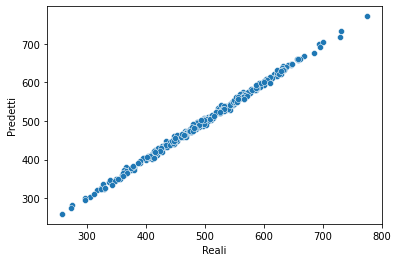

In [ ]:
sns.scatterplot(x='Reali',y='Predetti',data=pred_df);

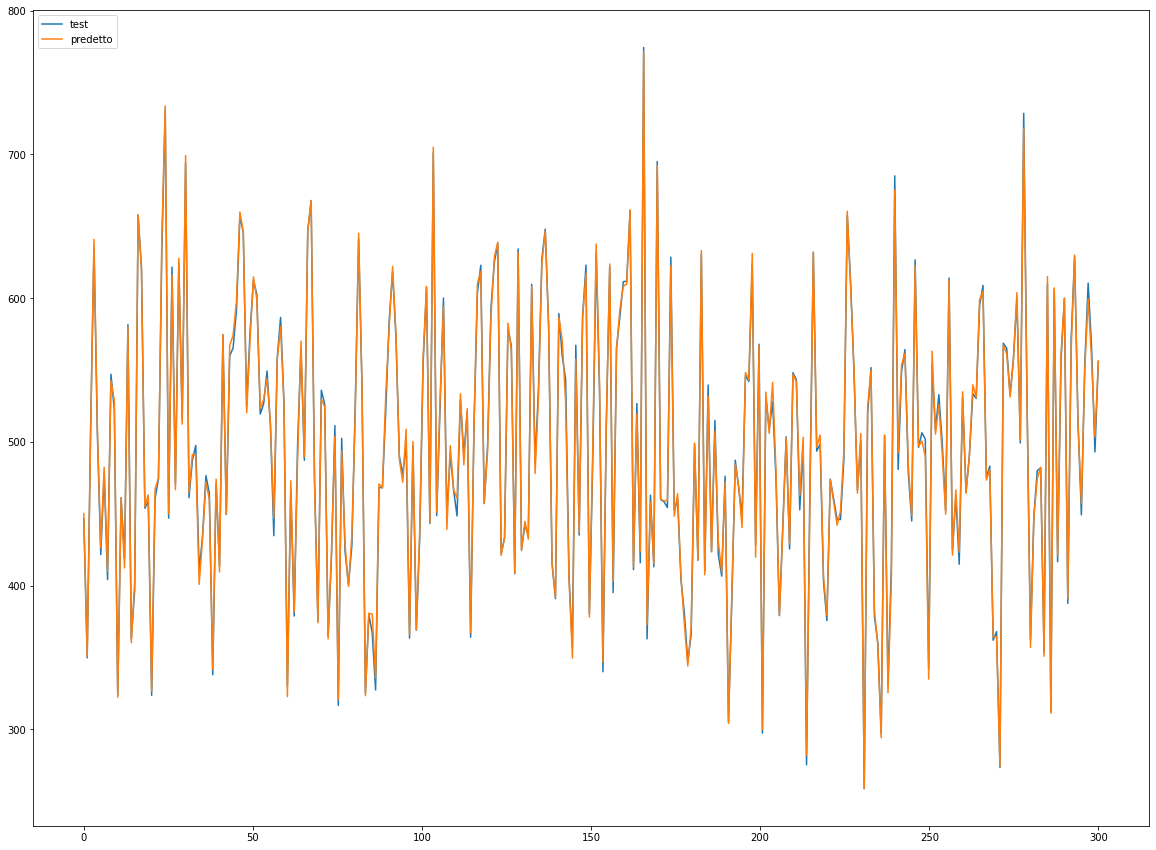

In [ ]:
length = pred_df.shape[0] # 30 
x = np.linspace(0,length,length)


plt.figure(figsize=(20,15))
plt.plot(x, y_test, label='test')
plt.plot(x, test_predictions, label='predetto')
plt.legend(loc=2);

In [ ]:
pred_df['Error'] = pred_df['Reali'] - pred_df['Predetti']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


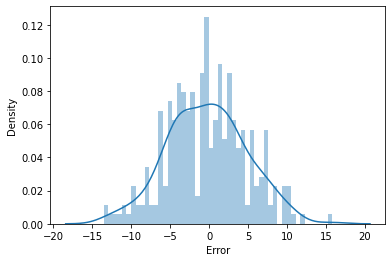

In [ ]:
sns.distplot(pred_df['Error'],bins=50);

In [ ]:
score = r2_score(y_test, test_predictions)
mae = mean_absolute_error(y_test, test_predictions)
mse = mean_squared_error(y_test, test_predictions)

print('r2_score: ', score)
print('mae: ', mae)
print('mse: ', mse)

r2_score:  0.9971404013124336
mae:  4.077785036122827
mse:  25.70593218354953


# Predicting on brand new data

What if we just saw a brand new gemstone from the ground? What should we price it at? This is the **exact** same procedure as predicting on a new test data!

In [ ]:
# [[Feature1, Feature2]]
new_gem = [[998,1000]]

In [ ]:
# Don't forget to scale!
scaler.transform(new_gem)

array([[0.14117652, 0.52980619]])

In [ ]:
new_gem = scaler.transform(new_gem)

In [ ]:
model.predict(new_gem)

array([[420.25186]], dtype=float32)

## Saving and Loading a Model

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'

In [ ]:
later_model = load_model('my_model.h5')

In [ ]:
later_model.predict(new_gem)

array([[420.25186]], dtype=float32)

# Example of creating a univariate dataset with a given mapping function


Text(0, 0.5, 'Output Variable (y)')

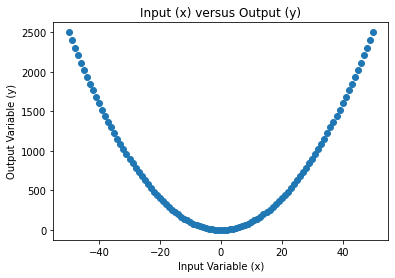

In [ ]:
import matplotlib.pyplot as plt
# define the input data
x = [i for i in range(-50,51)]
# define the output data
y = [i**2.0 for i in x]
# plot the input versus the output
plt.scatter(x,y)
plt.title('Input (x) versus Output (y)')
plt.xlabel('Input Variable (x)')
plt.ylabel('Output Variable (y)')
#pyplot.show()

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# define the dataset
x = np.asarray([i for i in range(-50,51)])
y = np.asarray([i**2.0 for i in x])
print(x.min(), x.max(), y.min(), y.max())

-50 50 0.0 2500.0


In [ ]:
# reshape arrays into into rows and cols
x = x.reshape((len(x), 1))
y = y.reshape((len(y), 1))

In [ ]:
# separately scale the input and output variables
scale_x = MinMaxScaler()
x = scale_x.fit_transform(x)
scale_y = MinMaxScaler()
y = scale_y.fit_transform(y)
print(x.min(), x.max(), y.min(), y.max())

0.0 1.0 0.0 1.0


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
# design the neural network model
model = Sequential()
model.add(Dense(10, input_dim=1, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1))

In [ ]:
# define the loss function and optimization algorithm
model.compile(loss='mse', optimizer='adam',metrics=['accuracy'])

We don’t have a lot of data (e.g. about 100 rows), so we will fit the model for 500 epochs and use a small batch size of 10

In [ ]:
# ft the model on the training dataset
model.fit(x, y, epochs=500, batch_size=10)

Epoch 1/500
11/11 [==============================] - 1s 2ms/step - loss: 1.2145 - accuracy: 0.0056
Epoch 2/500
11/11 [==============================] - 0s 2ms/step - loss: 0.8308 - accuracy: 0.0017
Epoch 3/500
11/11 [==============================] - 0s 2ms/step - loss: 0.6569 - accuracy: 0.0034
Epoch 4/500
11/11 [==============================] - 0s 2ms/step - loss: 0.4554 - accuracy: 0.0108
Epoch 5/500
11/11 [==============================] - 0s 3ms/step - loss: 0.3126 - accuracy: 0.0087
Epoch 6/500
11/11 [==============================] - 0s 2ms/step - loss: 0.1914 - accuracy: 0.0087
Epoch 7/500
11/11 [==============================] - 0s 2ms/step - loss: 0.1354 - accuracy: 0.0108
Epoch 8/500
11/11 [==============================] - 0s 2ms/step - loss: 0.1076 - accuracy: 0.0025
Epoch 9/500
11/11 [==============================] - 0s 2ms/step - loss: 0.1033 - accuracy: 0.0056
Epoch 10/500
11/11 [==============================] - 0s 2ms/step - loss: 0.0956 - accuracy: 0.0070
Epoch 11/

In [ ]:
# make predictions for the input data
y_pred = model.predict(x)

In [ ]:
# inverse transforms
x_plot = scale_x.inverse_transform(x)
y_plot = scale_y.inverse_transform(y)
y_pred_plot = scale_y.inverse_transform(y_pred)

In [ ]:
# report model error
from sklearn.metrics import mean_squared_error
print('MSE: %.3f' % mean_squared_error(y_plot, y_pred_plot))

MSE: 1778.061


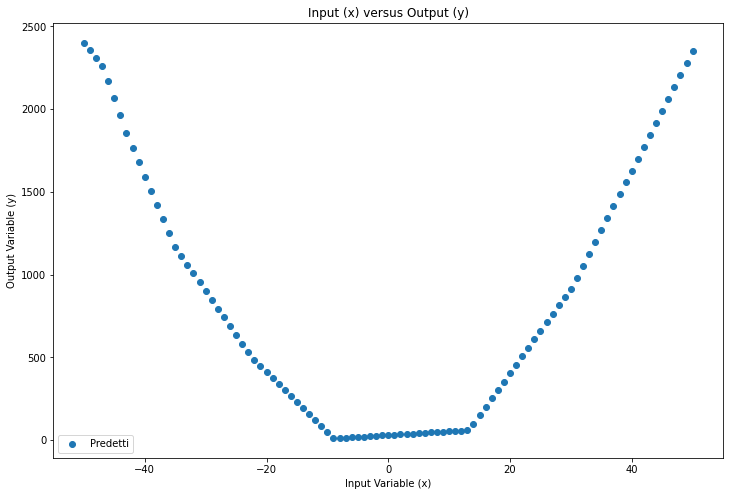

In [ ]:
# plot x vs y_pred
plt.figure(figsize=(12,8))
plt.scatter(x_plot,y_pred_plot, label='Predetti')
plt.title('Input (x) versus Output (y)')
plt.xlabel('Input Variable (x)')
plt.ylabel('Output Variable (y)')
plt.legend(loc=3)